In [93]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

# The Data 


In [94]:
train = pd.read_csv('titanic_train.csv')

In [95]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA
1. Missing Data

In [96]:
train.isnull()
#train.replace('', np.nan, inplace=True) this is for the values that dont have a null or NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

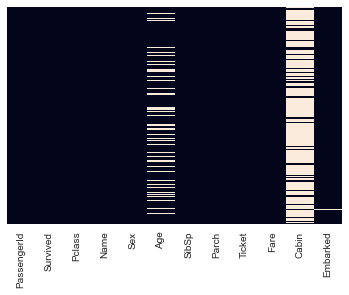

In [97]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [98]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

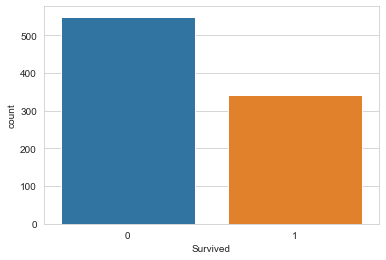

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

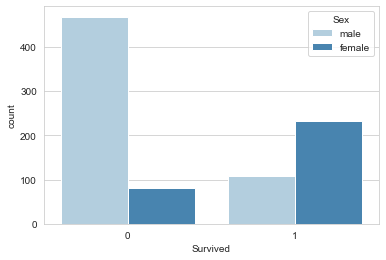

In [100]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='Blues')

<AxesSubplot:xlabel='Survived', ylabel='count'>

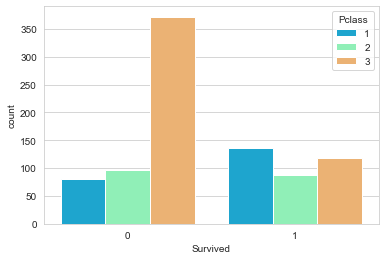

In [101]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

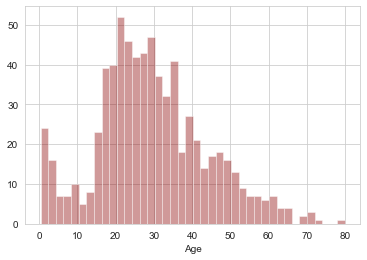

In [102]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

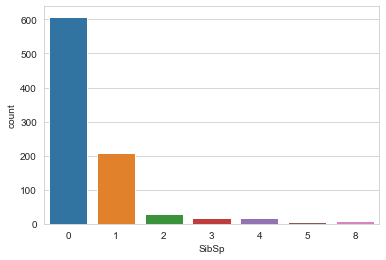

In [103]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

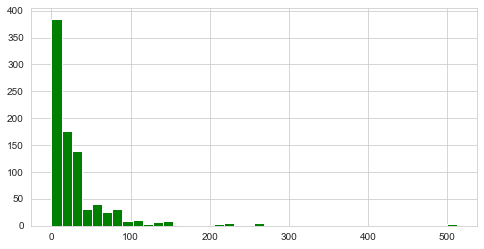

In [104]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

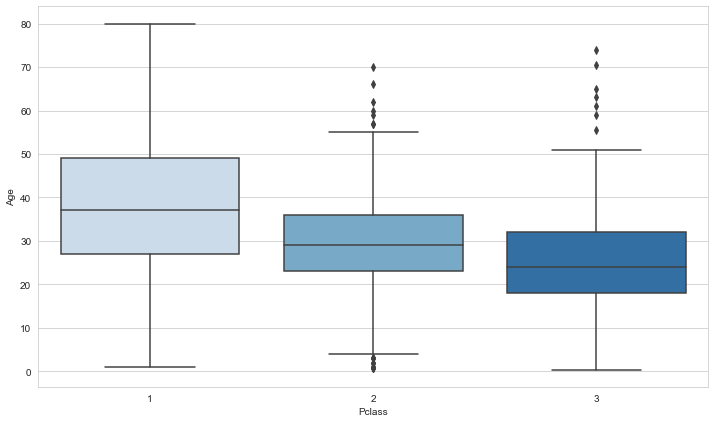

In [105]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='Blues')

In [106]:
p1=train[train['Pclass']==1]['Age'].median()
p2=train[train['Pclass']==2]['Age'].median()
p3=train[train['Pclass']==3]['Age'].median()

print(p1)
print(p2)
print(p3)

37.0
29.0
24.0


In [107]:
def impute_age(cols):     # it takes cols
    Age = cols[0] # this vari is for age cols 
    Pclass = cols[1] # this vari is for Pclass cols 
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return p1
        elif Pclass == 2:
            return p2
        else: 
            return p3
        
    else:
        return Age # it return the age when its not null

In [108]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis =1)

<AxesSubplot:>

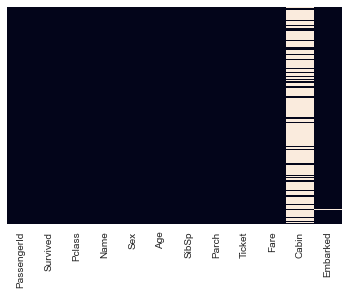

In [109]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [110]:
train.drop('Cabin',axis=1,inplace=True)  # inplace is to drop the coloum without reassigning to the variable

In [111]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

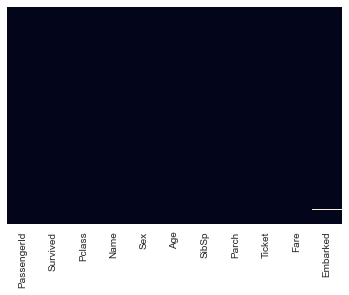

In [112]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

# categorical features 

In [114]:
# pd.get_dummies(train['Embarked']).head()
pd.get_dummies(train['Embarked'],drop_first=True).head() # it drop the C cols for the Embarked and if its 0 ,0 == C 

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [120]:
sex = pd.get_dummies(train['Sex'],drop_first=True) # feature is male and female male ==1 and 0 == female
embk=pd.get_dummies(train['Embarked'],drop_first=True)

In [121]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [122]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [123]:
train = pd.concat([train,sex,embk],axis=1)

In [124]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
